Welcome to Jupyter Notebook

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pickle

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(['CustomerId','Surname','RowNumber'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Preprocessing the dataset
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
geo_encoder = OneHotEncoder()
geo_encoder_location = geo_encoder.fit(data[['Geography']])
geo_encoder_location

OneHotEncoder()

In [5]:
geo_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [6]:
geo_encoder_location.transform(data[['Geography']]).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [7]:
geo_location = pd.DataFrame(geo_encoder_location.transform(data[['Geography']]).toarray(),columns=geo_encoder.get_feature_names_out(['Geography']))

In [8]:
# Concatenating the data
data = pd.concat([data.drop(['Geography'], axis=1), geo_location], axis=1)
Dataset = data

In [9]:
# Saving the encoder and decoder values

with open("label_encoder_gender.pkl","wb") as file:
    pickle.dump(label_encoder_gender,file=file)

with open("geo_encoder_location.pkl","wb") as file:
    pickle.dump(geo_encoder_location,file=file)

In [10]:
# Divide the dataset into train and test set
X = Dataset.drop(['Exited'], axis=1)
y = Dataset['Exited']

# Splitting the train and test set
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [11]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [12]:
# Saving the encoder and decoder values
with open("scalar_dataset.pkl","wb") as file:
    pickle.dump(scalar,file=file)

In [13]:
X_train.shape[0]

8000

ANN Implementation

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [15]:
# Build a Sequential Model
Model = Sequential(
    [
        Dense(64,activation ='relu', input_shape =(X_train.shape[1],)),
        Dense(32,activation ='relu'),
        Dense(1,activation = 'sigmoid')
    ]
)

In [16]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.02)

In [18]:
# Compile the Model
Model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
# Set up the tensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callbacks = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [20]:
#Set up for early stopping
early_stopping_callbacks = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

In [21]:
# Train the Model
History = Model.fit(
    X_train,y_train,validation_data =(X_test,y_test), epochs= 100, callbacks =[tensorflow_callbacks,early_stopping_callbacks]
)

Epoch 1/100


250/250 [==============================] - 8s 11ms/step - loss: 0.4009 - accuracy: 0.8294 - val_loss: 0.3536 - val_accuracy: 0.8555
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3597 - accuracy: 0.8521 - val_loss: 0.3514 - val_accuracy: 0.8605
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3523 - accuracy: 0.8526 - val_loss: 0.3457 - val_accuracy: 0.8590
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3503 - accuracy: 0.8547 - val_loss: 0.3995 - val_accuracy: 0.8565
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3473 - accuracy: 0.8574 - val_loss: 0.3548 - val_accuracy: 0.8610
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3448 - accuracy: 0.8585 - val_loss: 0.3422 - val_accuracy: 0.8610
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.3431 - accuracy: 0.8600 - val_loss: 0.3484 - val_accuracy: 0.8

In [22]:
Model.save("Model.h5")

c:\Users\SANDE\Documents\New Projects - ML\condavenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
History.history['loss']
History.history['val_accuracy']


[0.8554999828338623,
 0.8604999780654907,
 0.859000027179718,
 0.8565000295639038,
 0.8610000014305115,
 0.8610000014305115,
 0.8600000143051147,
 0.8650000095367432,
 0.8569999933242798,
 0.859000027179718,
 0.8650000095367432,
 0.8600000143051147,
 0.8619999885559082,
 0.8654999732971191,
 0.859000027179718,
 0.8554999828338623,
 0.8569999933242798,
 0.8610000014305115]

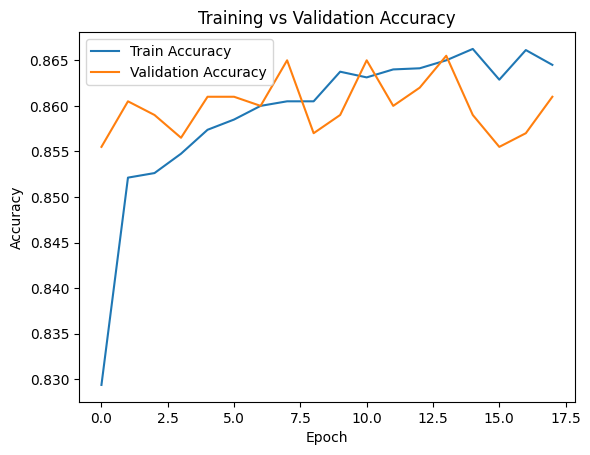

In [40]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'], label='Train Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [34]:
Model.get_weights()

[array([[-1.59336820e-01,  4.18067873e-02, -2.14775711e-01,
         -3.02970320e-01,  1.15218610e-02, -3.83284897e-01,
          1.18847573e+00, -1.67310843e-03, -4.95044321e-01,
          1.17223877e-02,  3.61921072e-01, -4.28811103e-01,
         -2.04136893e-01,  8.74320030e-01, -2.54739076e-01,
          4.07260954e-01, -5.83294690e-01, -1.36313111e-01,
         -6.66497767e-01, -6.03397012e-01,  1.11304179e-01,
          3.00316751e-01, -6.75543129e-01,  4.49402183e-02,
         -8.97590071e-04, -1.52328387e-01, -1.52794838e-01,
         -2.52379090e-01, -1.40912682e-01,  2.27455795e-01,
         -2.29400590e-01,  3.73890668e-01, -1.06865123e-01,
         -4.29646820e-01,  8.03436339e-01, -5.09986877e-01,
         -5.61134517e-01, -5.80516085e-03, -4.52082574e-01,
          4.52298075e-02, -3.90754700e-01,  6.80326581e-01,
          1.65605798e-01,  1.14238545e-01,  1.80102691e-01,
         -1.88400015e-01,  4.28633764e-02,  2.68561304e-01,
          1.05799727e-01,  4.33901623e-0

In [35]:
for i, w in enumerate(Model.get_weights()):
    print(f"Weight {i}: shape = {w.shape}")

Weight 0: shape = (12, 64)
Weight 1: shape = (64,)
Weight 2: shape = (64, 32)
Weight 3: shape = (32,)
Weight 4: shape = (32, 1)
Weight 5: shape = (1,)


In [43]:
# Load Tensorboard Extension
%reload_ext tensorboard

In [44]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22460), started 9:52:07 ago. (Use '!kill 22460' to kill it.)